<img align="center" src="img/course.png" width="800">

# 16720 (B)  Object Tracking in Videos - Assignment 6
    Instructor: Kris                          TAs: Wen-Hsuan (Lead), Zen, Yan, Rawal, Paritosh, Qichen

# Instructions

This section should include the visualizations and answers to specifically highlighted questions from Q1 to Q3. This section will need to be uploaded to gradescope as a pdf and manually graded (this is a separate submission from the coding notebooks) 


1. Students are encouraged to work in groups but each student must submit their own work. Include the names of your collaborators in your write up. Code should <span style='color:red'>Not</span>  be shared or copied. Please properly give credits to others by <span style='color:red'>LISTING EVERY COLLABORATOR</span> in the writeup including any code segments that you discussed,  Please <span style='color:red'>DO NOT</span>  use external code unless permitted. Plagiarism is prohibited and may lead to failure of this course.

2.  **Start early!** This homework will take a long time to complete.
    
3. **Questions:** If you have any question, please look at Piazza first and the FAQ page for this homework.

4. All the theory question and manually graded questions should be included in a single writeup (this notebook exported as pdf or a standalone pdf file) and submitted to gradescope: pdf assignment. 

5. **Attempt to verify your implementation as you proceed:** If you don’t verify that your implementation is correct on toy examples, you will risk having a huge issue when you put everything together. We provide some simple checks in the notebook cells, but make sure you verify them on more complicated samples before moving forward. 

6. **Do not import external functions/packages other than the ones already imported in the files:** The current imported functions and packages are enough for you to complete this assignment. If you need to import other functions, please remember to comment them out after submission. Our autograder will crash if you import a new function that the gradescope server does not expect. 

7. Assignments that do not follow this submission rule will be **penalized up to 10\% of the total score**.

# Preliminaries
In this section, we will go through some of the basics of the Lucas-Kanade tracker and the Matthews-Baker tracker. The following table contains a summary of the variables used in the rest of the assignment.

![title](img/variables.png)

## Template
A template describes the object of interest (eg. a car, football) which we wish to track in a video. Traditionally, the tracking algorithm is initialized with a template, which is represented by a bounding box around the object to be tracked in the first frame of the video. For each of the subsequent frames in the video, the tracker will update its estimate of the object in the image. The tracker achieves this by updating its affine warp.

## Warps
What is a warp? An image transformation or warp $\textbf{W}$ is a function that acts on pixel coordinates $\textbf{x} = \left[u\;\;v\right]^T$
and maps pixel values from one place to another in an image $\textbf{x}' =
\left[u'\;\;v'\right]^T$. Simply put, $\textbf{W}$ maps a pixel with coordinates $\textbf{x} = \left[u\;\;v\right]^T$ to $\textbf{x}' =
\left[u'\;\;v'\right]^T$. Translation, rotation, and scaling are all examples of warps. We denote the parameters of the warp function $\textbf{W}$ by $\textbf{p}$: 

$$
\begin{gathered}
\textbf{x}'= \textbf{W}(\textbf{x};\textbf{p})
\end{gathered}
$$

## Affine Warp
An affine warp is a particular kind of warp that can include any combination of translation, scaling, and rotations. An affine warp can be represented by 6 parameters $\textbf{p} = [p_1\;p_2\;p_3\;p_4\;p_5\;p_6]^{T}$. One of the most convenient things about an affine warp is that it is linear; its action on a point with coordinates $\textbf{x} = \left[u\;\;v\right]^T$ can be described as a matrix operation by a $3 \times 3$ matrix $\textbf{W}(\textbf{p})$:,

$$
\begin{gathered}
\left[ \begin{array}{c} u' \\ v' \\ 1 \end{array} \right] = \textbf{W}(\textbf{p}) \left[
\begin{array}{c} u \\ v \\ 1 \end{array} \right]
\end{gathered}
$$

$$
\begin{gathered}
\textbf{W}(\textbf{p}) = \begin{bmatrix} 1+p_1 & p_3 & p_5 \\ p_2 & 1+p_4 & p_6 \\ 0 & 0 & 1 \end{bmatrix}
\end{gathered}
$$

Note: For convenience, when we want to refer to the warp as a function, we will use $\textbf{W}(\textbf{x};\textbf{p})$ and when we want to refer to the matrix for an affine warp, we will use $\textbf{W}(\textbf{p})$. We will use affine warp and affine transformation interchangeably.

# Theory Questions (30 pts)

Before implementing the trackers, let's study some simple problems that will be useful during the implementation first. The answers to the below questions should be relatively short, consisting of a few lines of math and text.  

## Q1.1
Assuming the affine warp model defined above, derive the expression for the $\frac{\partial \textbf{W}}{\partial \textbf{p}}$ in terms of the warp parameters $\textbf{p} = [p_1\;p_2\;p_3\;p_4\;p_5\;p_6]'$.

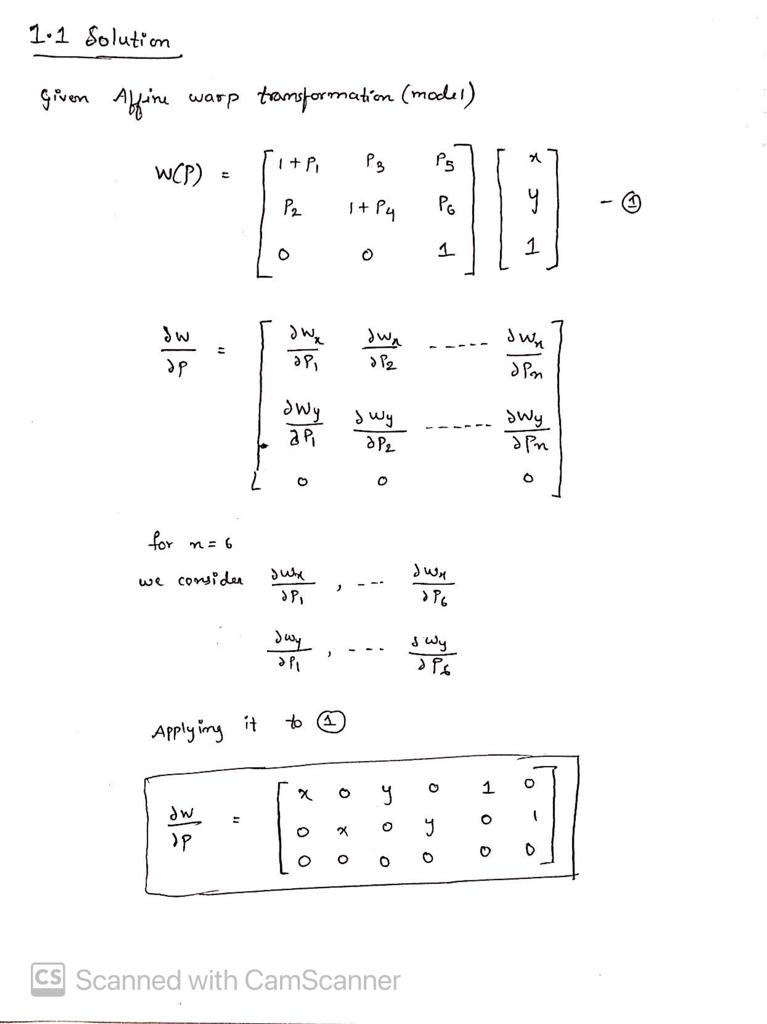

## Q1.2
Find the computational complexity (Big O notation) for each runtime iteration (computing $\textbf{J}$ and $\textbf{H}^{-1}$) of the Lucas Kanade method. Express your answers in terms of $n$, $m$ and $p$ where $n$ is the number of pixels in thetemplate $\textbf{T}$, $m$ is the number of pixels in an input image $\textbf{I}$ and $p$ is the number of parameters used to describe the warp $W$.

You may refer to the supplementary PDF for more detailed descriptions of the algorithm.

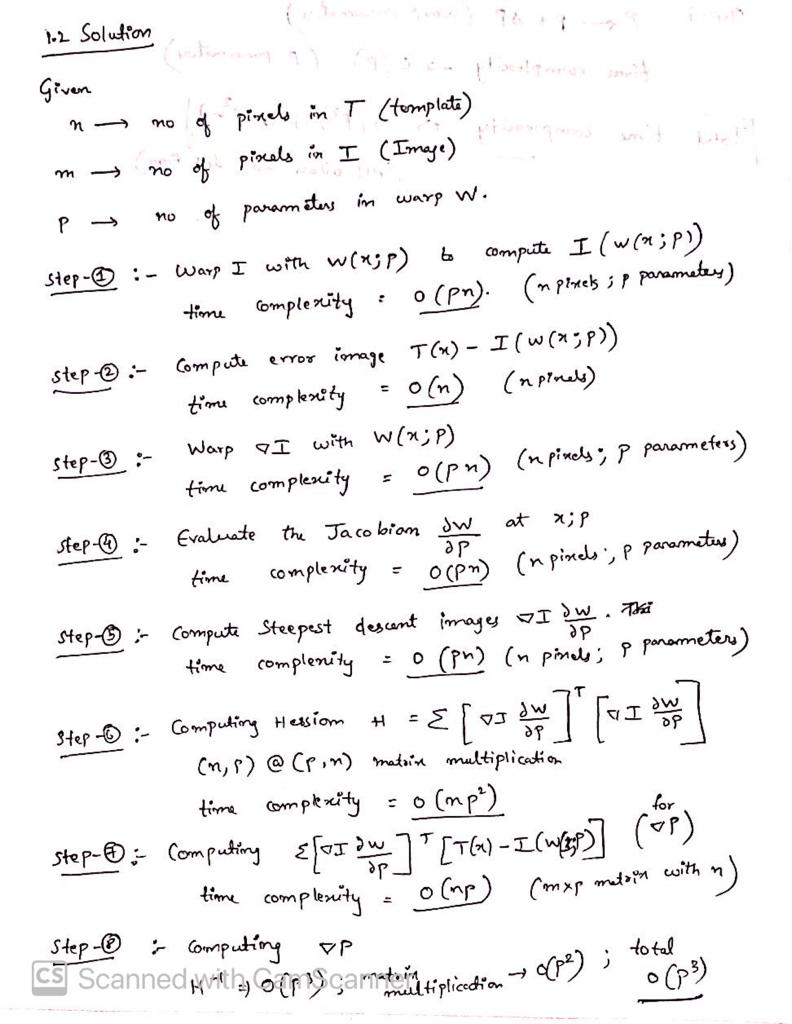
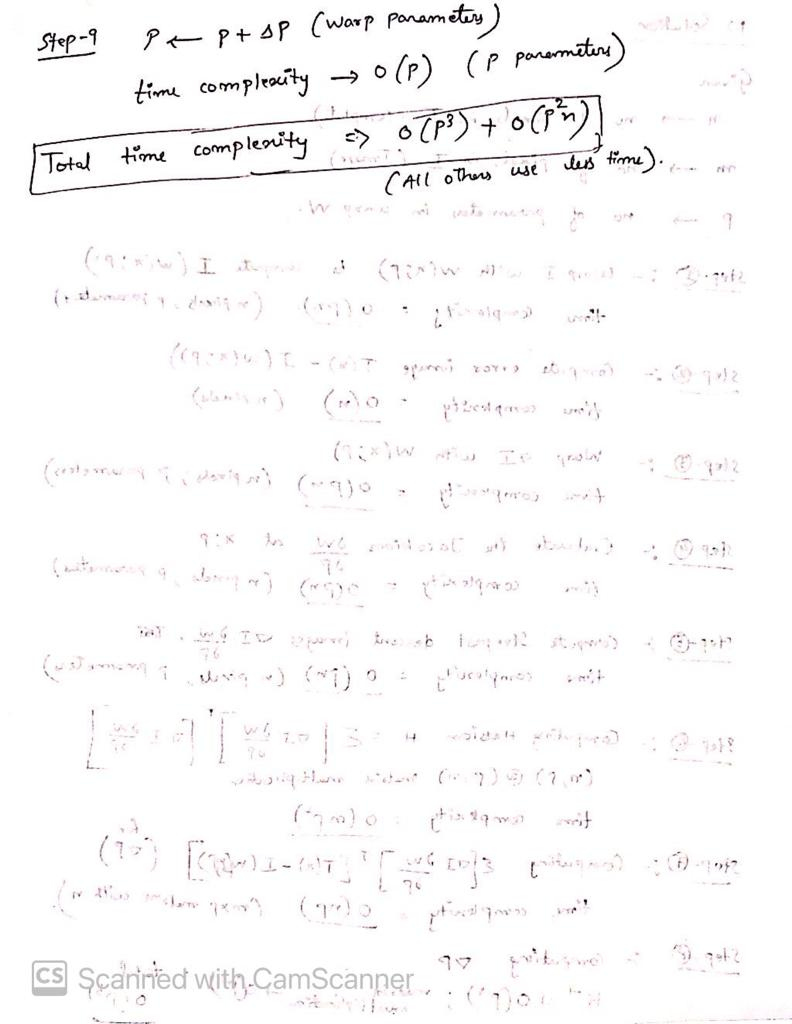

## Q1.3
Find the computational complexity (Big O notation) for the initialization step (Precomputing $\textbf{J}$ and $\textbf{H}^{-1}$) and for each runtime iteration of the Matthews-Baker method. Express your answers in terms of $n$, $m$ and $p$ where $n$ is the number of pixels in the template $\textbf{T}$, $m$ is the number of pixels in an input image $\textbf{I}$ and $p$ is the number of parameters used to describe the warp $W$. You may refer to the supplementary PDF for more detailed descriptions of the algorithm.

How does this compare to the run time of the regular Lucas-Kanade method?

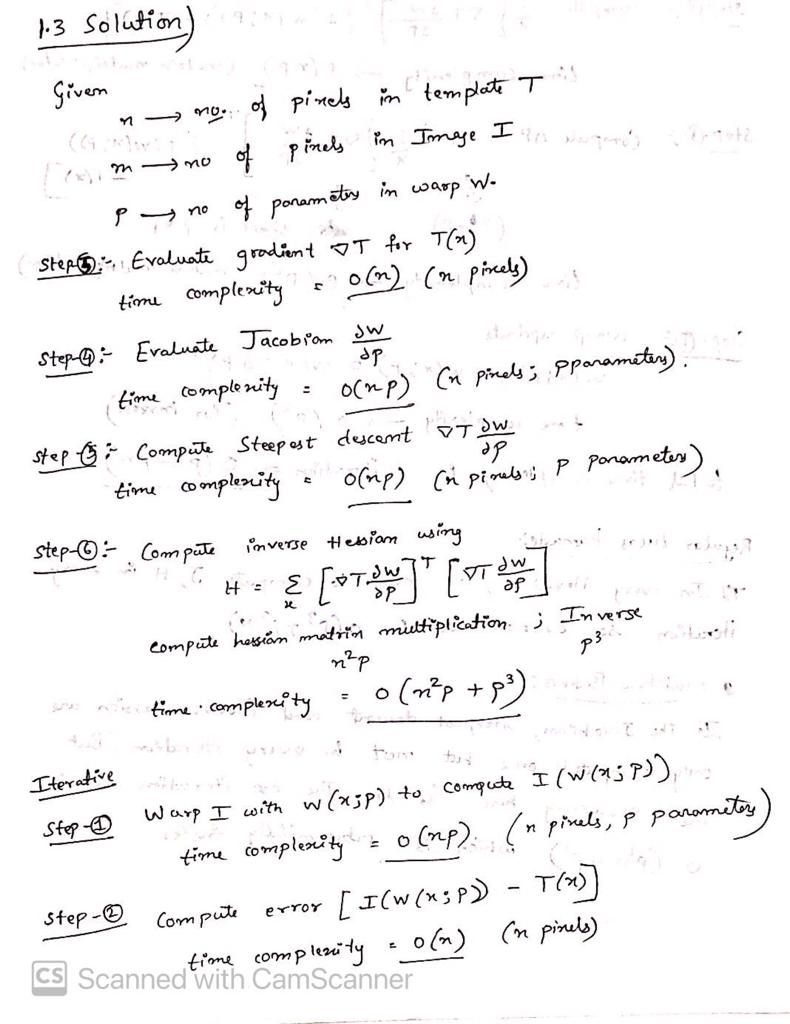
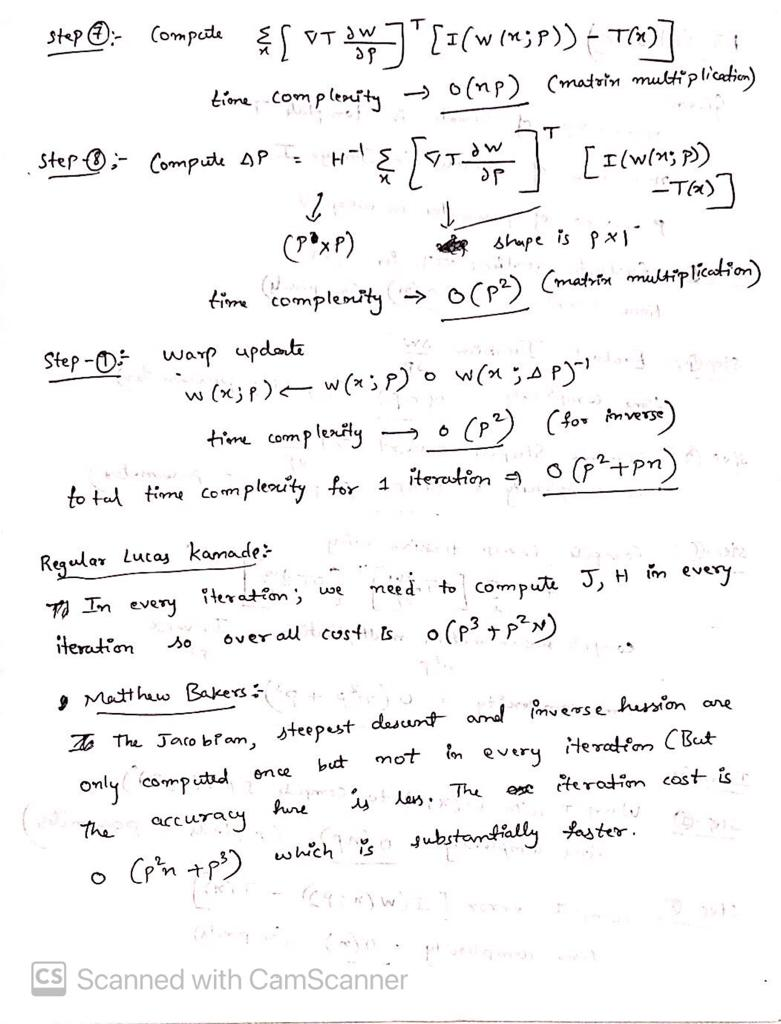

# Coding Questions Write-up

## Q1.1

## Solution
### The first and last set of three images are first and last three consecutive frames respectively. The other images are intermediate images.

### 1) Landing

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "lk_landing1.png" style = "width:300px;height:900px"/></td>
<td><img src = "lk_landingm1.png" style = "width:300px;height:900px"/></td>
<td><img src = "lk_landingm2.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "lk_landingm3.png" style = "width:300px;height:900px"/></td>
<td><img src = "lk_landingf.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 2) Car1

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "lkcar11.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkcar12.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkcar13.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "lkcar14.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkcar15.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 3) Car2

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "lkcar21.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkcar22.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkcar23.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "lkcar24.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkcar25.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 4) Race

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "horse1.png" style = "width:300px;height:900px"/></td>
<td><img src = "horse2.png" style = "width:300px;height:900px"/></td>
<td><img src = "horse3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "horse4.png" style = "width:300px;height:900px"/></td>
<td><img src = "horse5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 5) Ballet

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "lkballet1.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkballet2.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkballet3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "lkballet4.png" style = "width:300px;height:900px"/></td>
<td><img src = "lkballet5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### Code

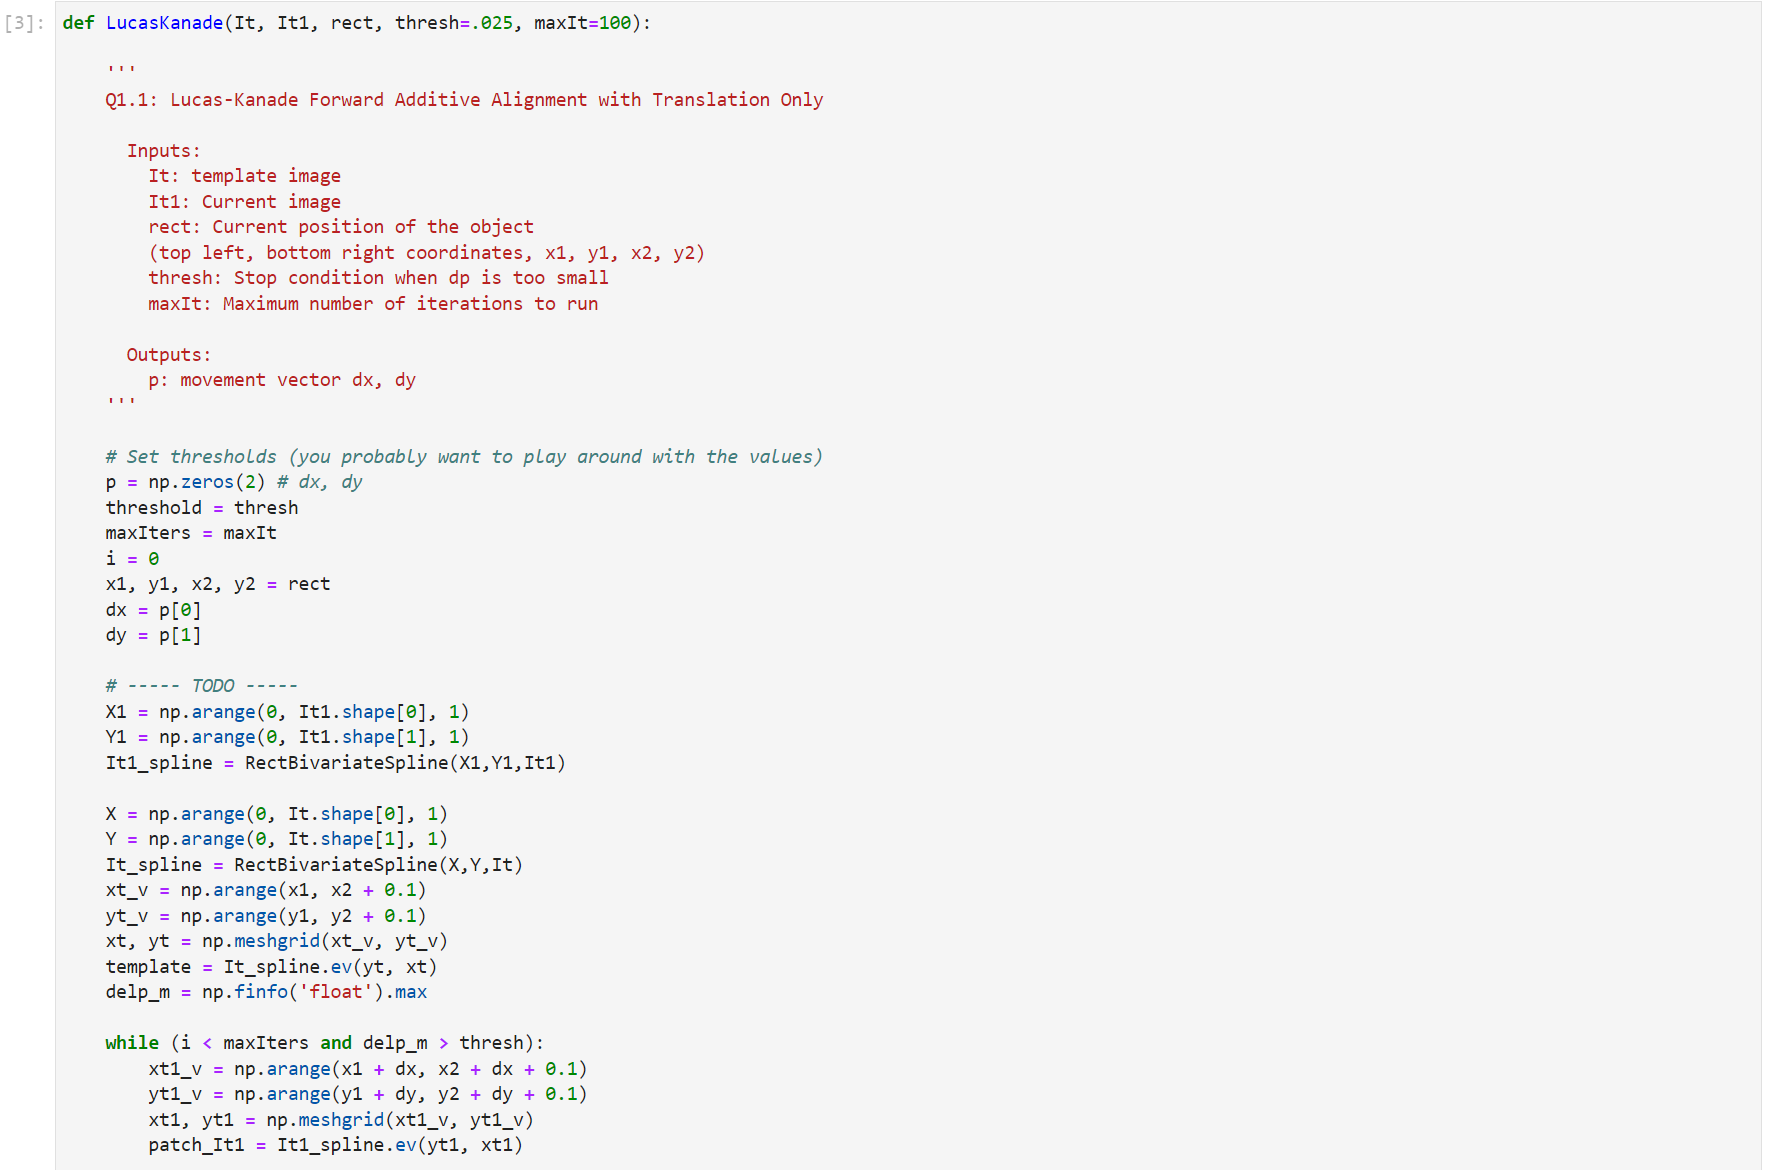
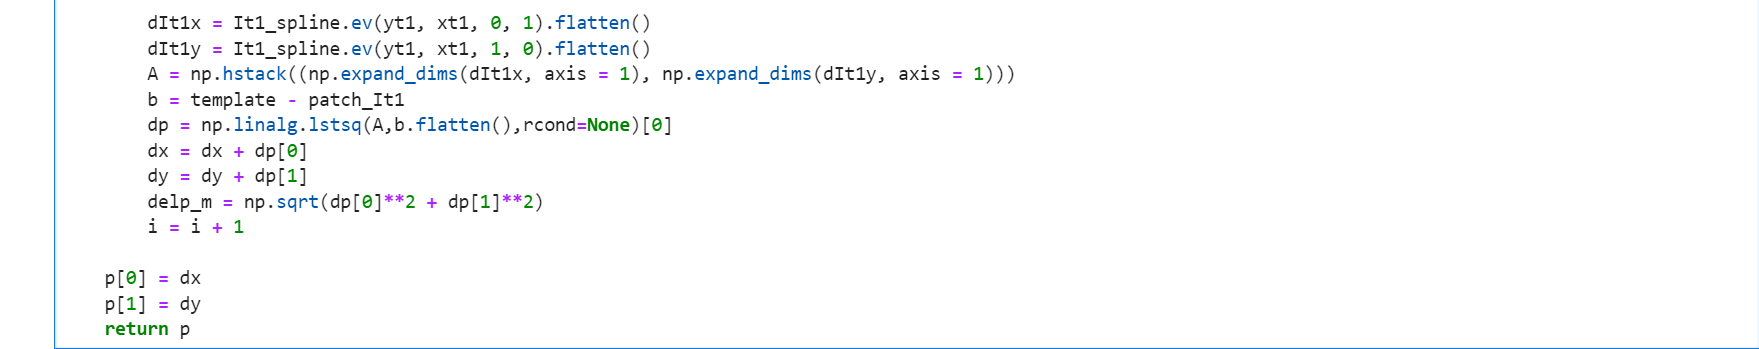

### End


## Q1.2

## Solution
### The first and last set of three images are first and last three consecutive frames respectively. The other images are intermediate images.

### 1) Landing

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./1.2/landing1.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/landing2.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/landing3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./1.2/landing4.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/landing5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 2) Car 1

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./1.2/car11.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/car12.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/car13.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./1.2/car14.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/car15.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 3) Car 2

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./1.2/car21.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/car22.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/car23.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./1.2/car24.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/car25.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 4) Race

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./1.2/horse1.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/horse1.5.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/horse2.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./1.2/horse3.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/horse4.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 5) Ballet

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./1.2/ballet1.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/ballet2.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/ballet3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./1.2/ballet4.png" style = "width:300px;height:900px"/></td>
<td><img src = "./1.2/ballet5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### Code

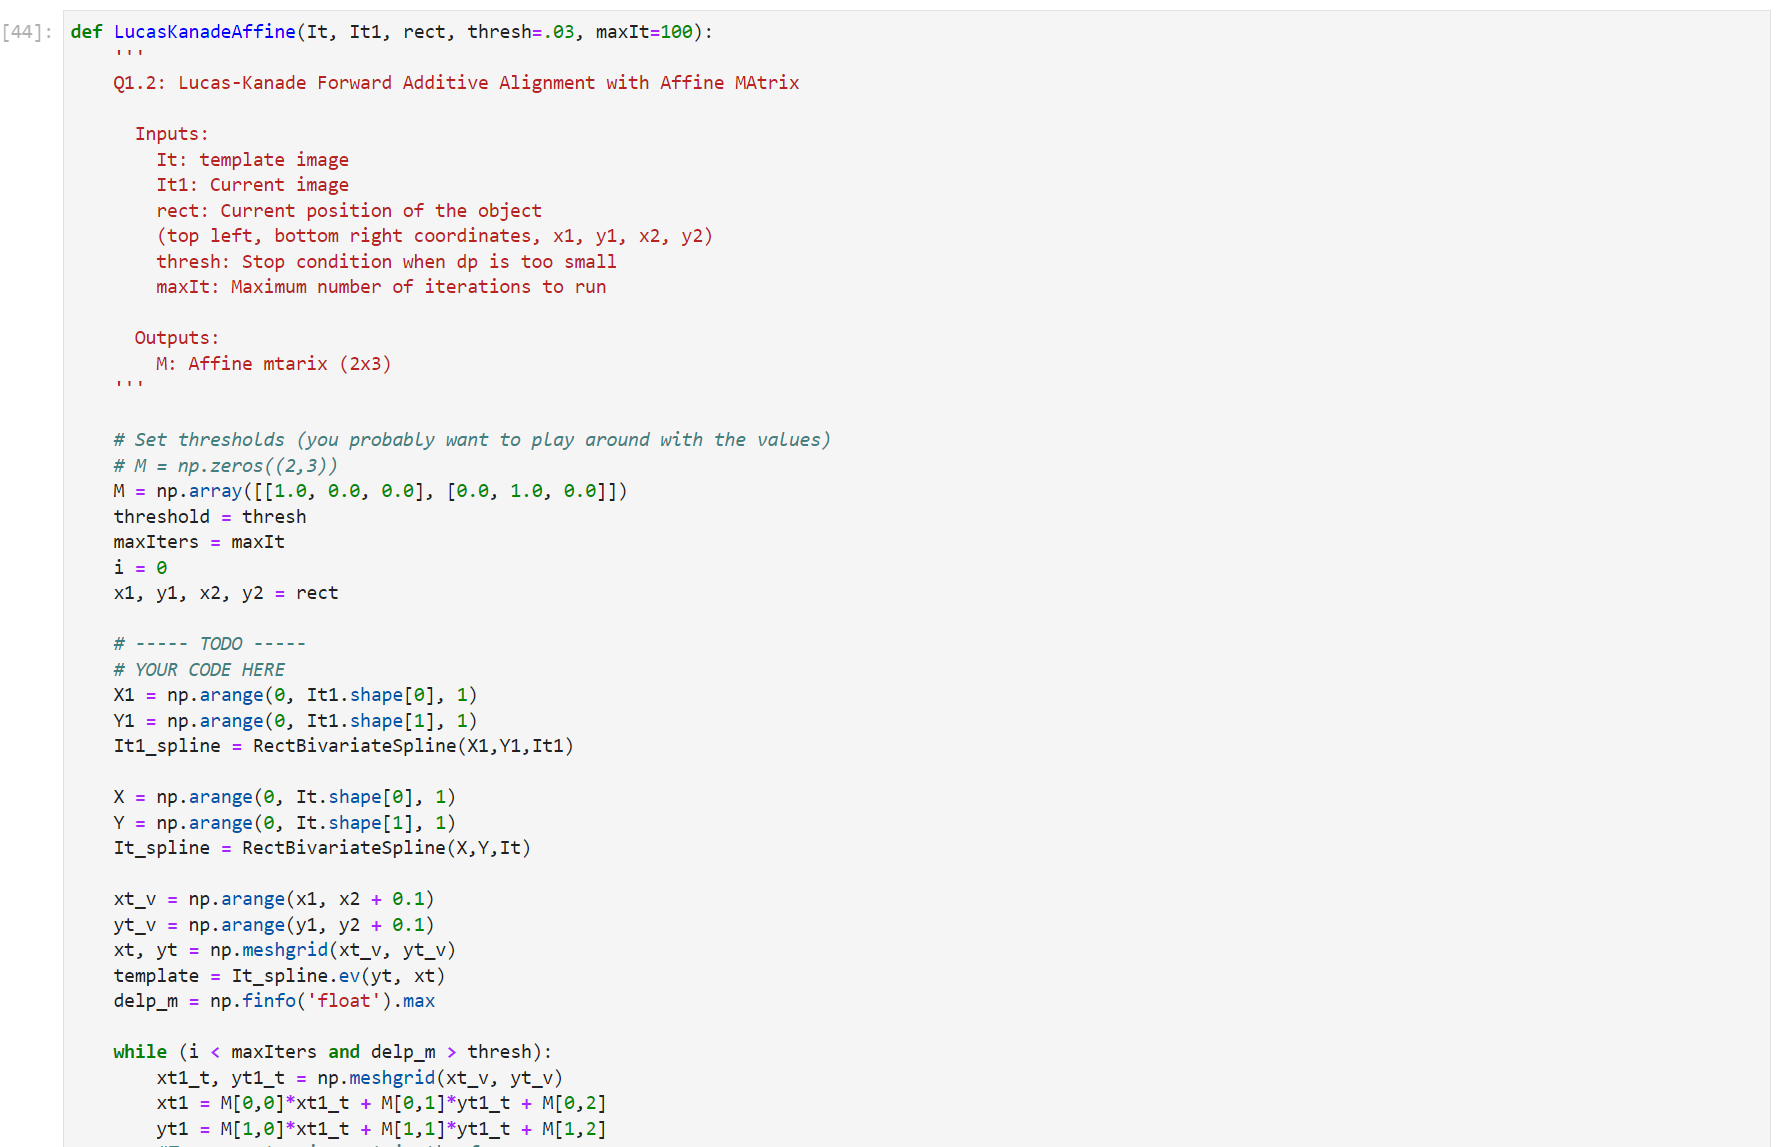
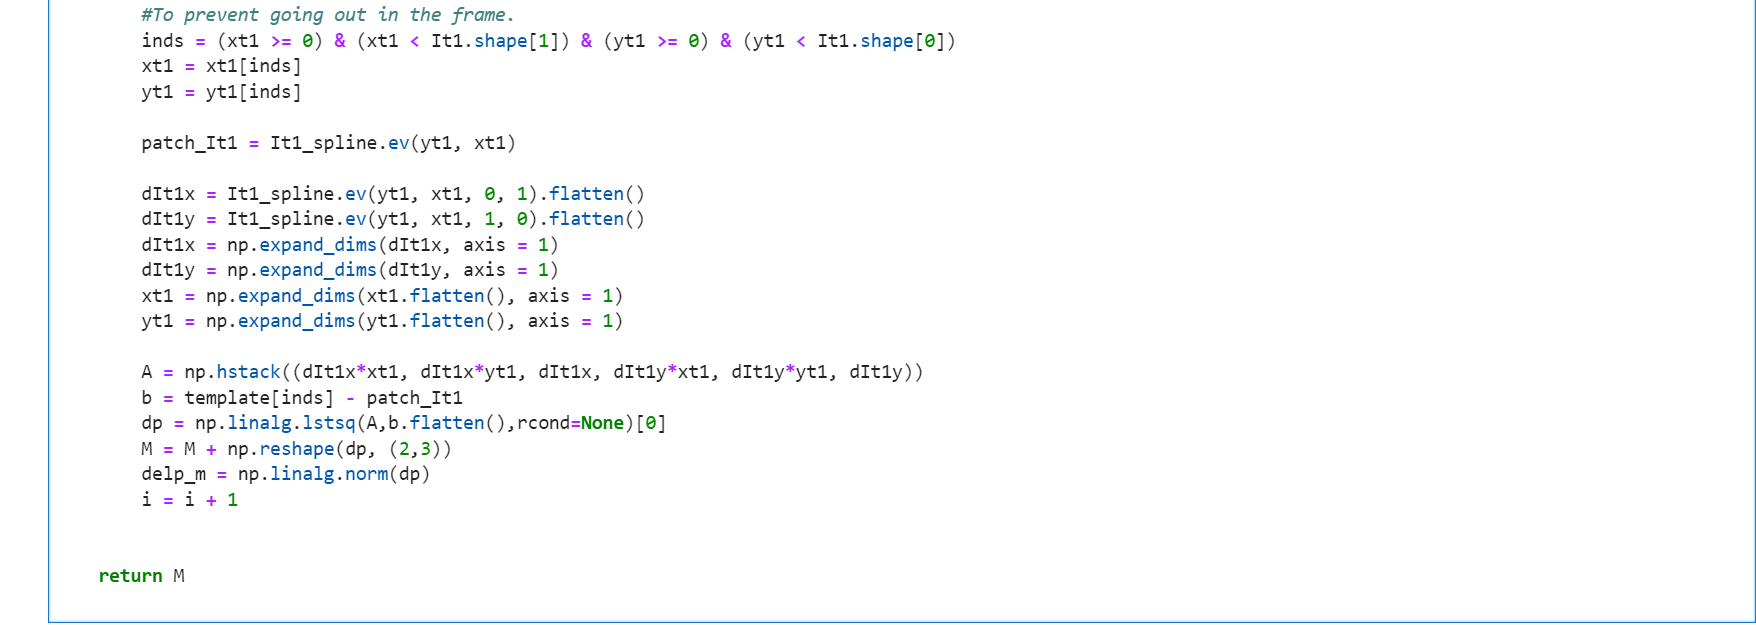


### End

## Q2.1

## Solution
### The first and last set of three images are first and last three consecutive frames respectively. The other images are intermediate images.

### 1) Landing

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./2.1/landing1.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/landing2.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/landing3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./2.1/landing4.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/landing5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 2) Car1
<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./2.1/car11.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/car12.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/car13.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./2.1/car14.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/car15.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 3) Car2

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./2.1/car21.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/car22.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/car23.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./2.1/car24.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/car25.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 4) Race

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./2.1/race1.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/race2.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/race3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./2.1/race4.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/race5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### 5) Ballet

<figcaption align = "center"><b>  </b></figcaption>
<table><tr>
<td><img src = "./2.1/ballet1.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/ballet2.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/ballet3.png" style = "width:300px;height:900px"/></td>
</tr></table>
<table><tr>
<td><img src = "./2.1/ballet4.png" style = "width:300px;height:900px"/></td>
<td><img src = "./2.1/ballet5.png" style = "width:300px;height:900px"/></td>
</tr></table>

### Code

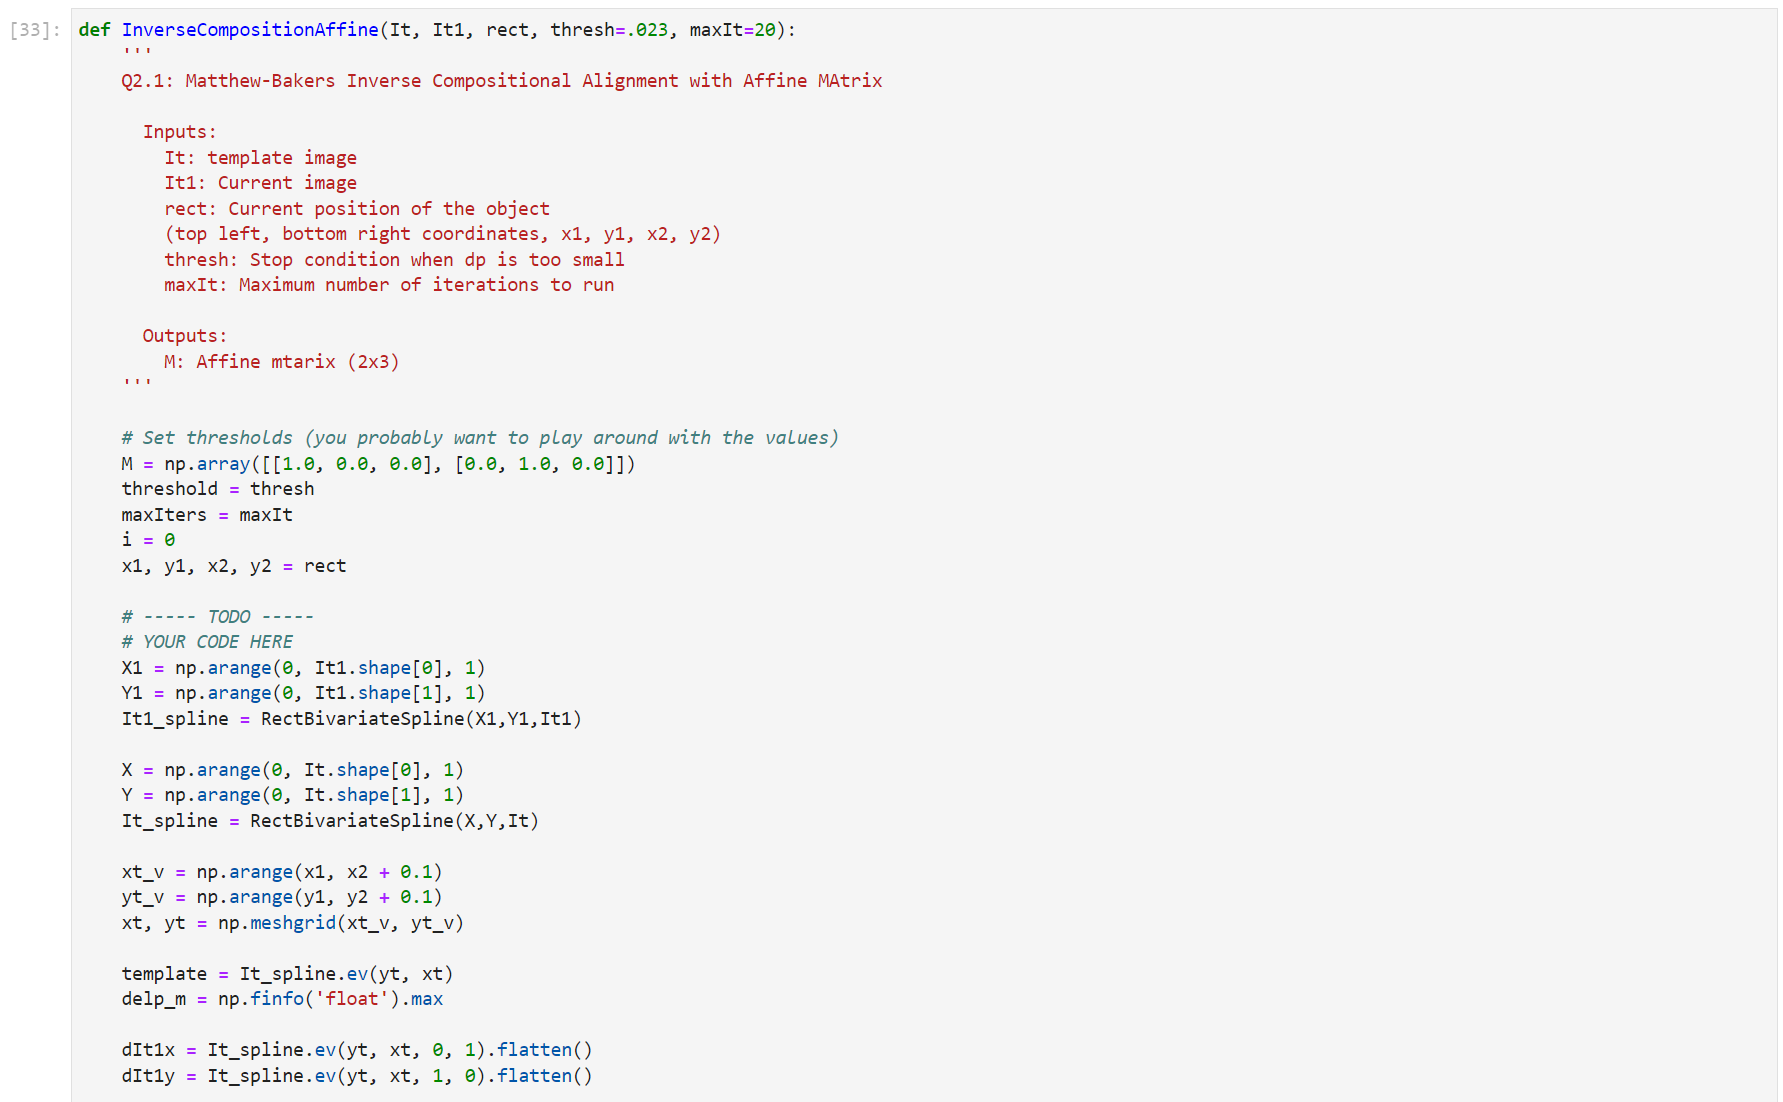
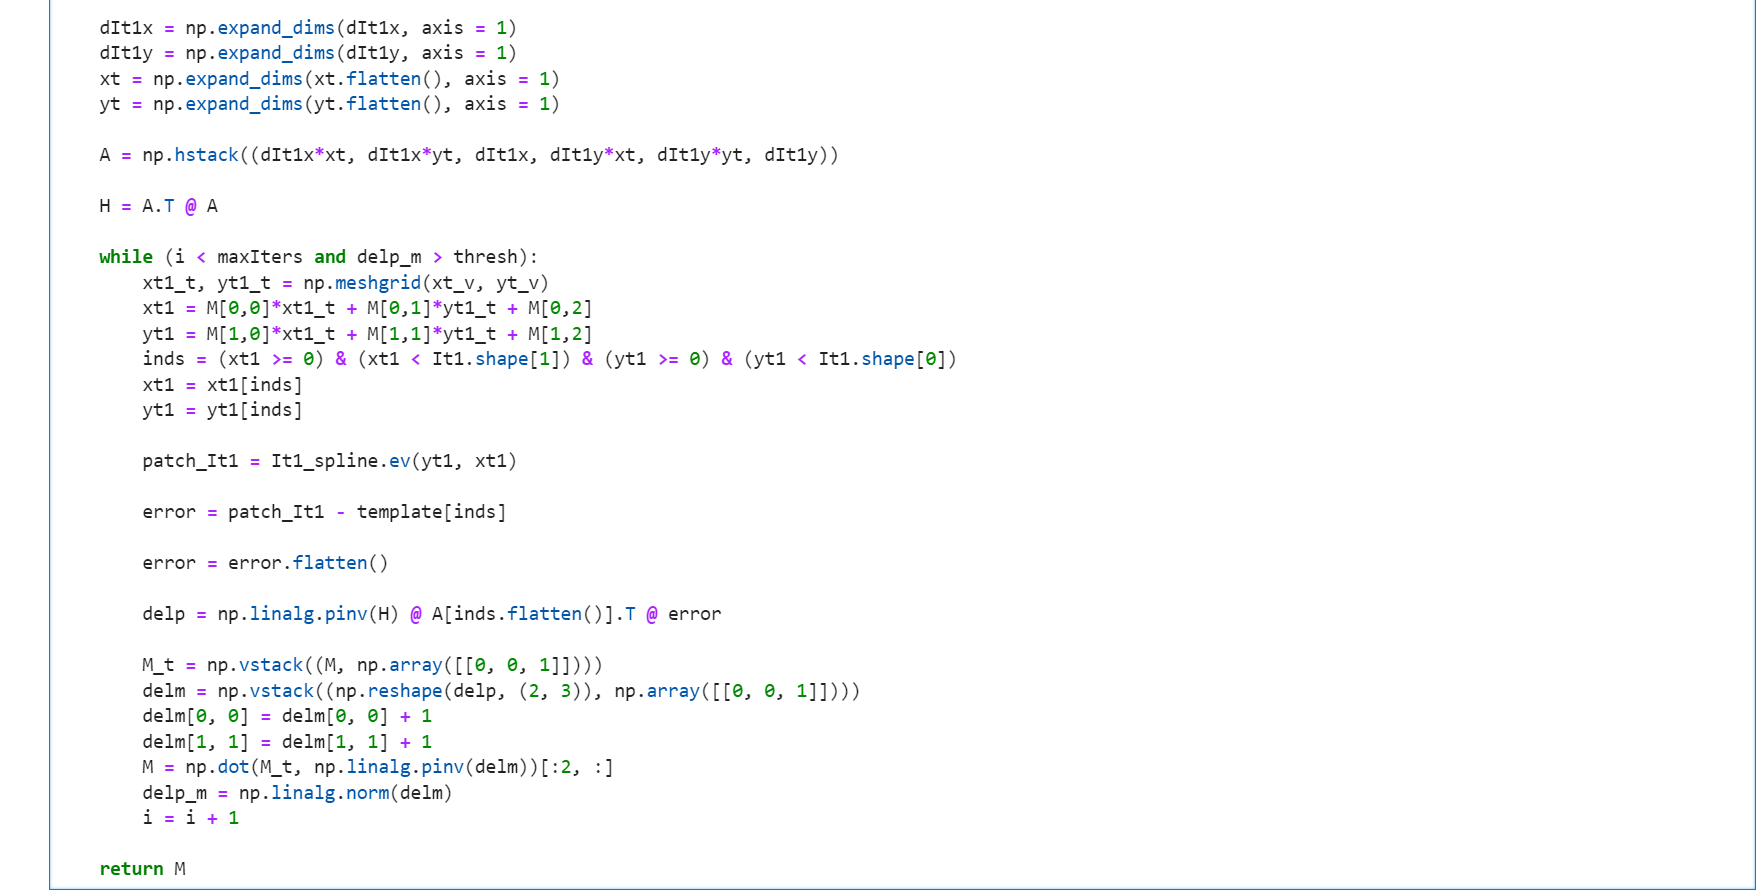

### End

## Q2.2

#### Comparision of algorithms

### Comparision of actual images is shown in Q2.1

## Q1.1) Lucas Kanade using only translation parameters
Since the algorithm we wrote uses only translation parameters, the box size doesn't change even though the actual size of object changes. But just considering the center of the box, it has very good results.
In car1, race and car2 the size of car/horse is almost the same in entire video so it seems like it is performing very good. In landing video the size of "35" is changing so it performs worst.

## Q1.2) Lucas Kanade with all Affine parameters
Here we consider all the affine parameters. As shown the results for car2 and ballet are worse because the motion of the object is very high between consecutive frames and the brightness constancy equation(small motion assumption) fails. For car1, race and landing it is detecting the bounding box with much better accuracy. 

## Q2.1) Matthew Bakers with all Affine parameters
Here we consider all the affine parameters. As shown the results for car2 and ballet are worse because the motion of the object is very high between consecutive frames and the brightness constancy equation(small motion assumption) fails.

#### Additional Explanation
In addition computing the inverse hessian and jacobian outside the loop assuming p is constant for template image increases the speed but decreases the accuracy of bounding boxes, making it perform worse in car1, car2 and ballet videos.

##### Landing
Landing performs very well in all algorithms because the movement of "35" is significantly less in consevutive frames. race also performs equally well in all the algorithms.

##### Ballet
The Ballet video fails in almost three cases because the ballet dancer is moving so fast, especially in last few frames, where the brightness constancy equation(small motion assumption) fails.

##### Car 2
The Ballet video fails in almost three cases because the car is moving so fast, especially in last few frames, where the brightness constancy equation(small motion assumption) fails. Also it seems to think the traffic light is inside the bounding box so it is tracking the traffic light as well.

I used different thresholds for different algorithms and different pictures to get the best possible results. Giving less higher threshold gives scope for the box to move more, but it can also make the boxes to deviate more. So threshold and iterations are a hyper parameter to be tuned.

In addition I also considered the image size while warping so that when bounding box goes out of frame, the warp considers only pixels inside the image.

Lucas Kanade using translation performs decent because the least squares(linear) solution has to estimate only two parameters. (In terms of speed).

Considering the fastness, matthew baker performs best because of pre computation of jacobian and hessian outside the loop, and lucas kanade performs worst because of computation of jacobian and hessian inside the loop.

## Q3

YOUR ANSWER HERE